In [3]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
import sys
sys.path.insert(0, path.abspath(path.join(path.curdir, '../src')))

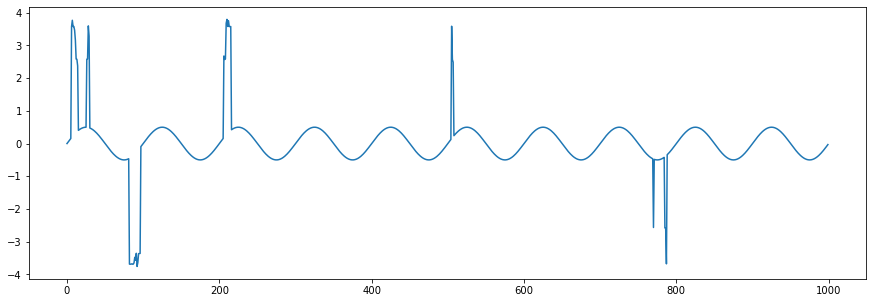

In [4]:
signal_df = pd.read_csv('test_signal_modified.csv')
#signal_array = pd.DataFrame.to_numpy(signal_df)
signal_df.rename(columns={ signal_df.columns[0]: "A" }, inplace = True)
plt.figure(figsize= (15,5))
plt.plot(signal_df.A)

In [5]:
# Find independent oscillation periods

threshold = 2 #acceleration threshold (m/s^2)
threshold_neg = -2
limit = 3 #Zeitkonstante

In [6]:
# find start values of impact event

constraints = signal_df.A[(signal_df.A > threshold) | (signal_df.A < threshold_neg)]

# find the indices where the difference is bigger than the time limit (avoid correlation)

deltaT_startImpact = constraints[constraints.index.to_series().diff() > limit].index.to_list()

# find the points in time where the threshold is exceeded (start of the impact event)
# add the start of the first impact event
deltaT_startImpact.insert(0, constraints.index[0])

print(f'deltaT start impact: {deltaT_startImpact}')
#print(f'constraints:{constraints}')

deltaT start impact: [6, 26, 82, 206, 505, 770, 785]


In [7]:
# find end values of impact event

constraints_inverse = constraints.sort_index(ascending=False)

# find the indices where the difference is bigger than the time limit (avoid correlation)

deltaT_endImpact = constraints_inverse[constraints_inverse.index.to_series().diff() < -limit].index.to_list()

# find the points in time where the threshold is exceeded (start of the impact event)
# add the end of the last impact event
deltaT_endImpact.insert(0, constraints_inverse.index[0])
deltaT_endImpact.sort(reverse=False)


print(f'deltaT end impact: {deltaT_endImpact}')
#print(f'inverse constraints:{constraints_inverse}')

deltaT end impact: [14, 29, 96, 215, 507, 770, 787]


In [8]:
impact_times = list()

for i in range(len(deltaT_endImpact) ): 
    if (deltaT_endImpact[i]- deltaT_startImpact[i]) > 3 :
        # filter out measurement errors
        impact_times.append((deltaT_startImpact[i], deltaT_endImpact[i]))

print(impact_times)

[(6, 14), (82, 96), (206, 215)]


In [12]:
# Analyze time before first impact event
indep_osc = signal_df.A[0:impact_times[0][0]]
print(indep_osc)

0    0.000000
1    0.031395
2    0.062667
3    0.093691
4    0.124345
5    0.154508
Name: A, dtype: float64
<class 'pandas.core.series.Series'>


[]
[(6, 14)]
[]
[]
[]
[]


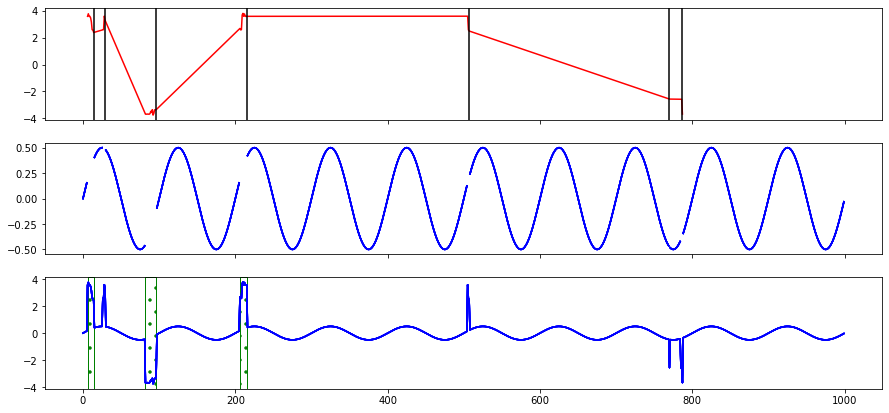

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(sharex=True, nrows=3, figsize= (15,7))
ax1.plot(constraints, color= 'r')

for i in deltaT_endImpact:
    ax1.axvline(x=i, color='k')
    ax2.plot(signal_df.A.mask((signal_df.A > 2) | (signal_df.A < -2)), color= 'b')
    ax3.plot(signal_df.A, color= 'b')

for i in range(len(impact_times)):
    for j in range (0,1):
        print(impact_times[i:j])
        print(impact_times[i:j+1])
        ax3.axvspan(xmin=impact_times[i][j], xmax=impact_times[i][j+1], hatch='.', facecolor='white', edgecolor='g') 